In [12]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel('ENB2012_data.xlsx')

print(data.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [21]:
def correlation_test(data, target):
    results = []
    for col in data.columns:
        if col != target:
            coef, p_value = pearsonr(data[col], data[target])
            results.append((col, coef, p_value))
    return pd.DataFrame(results, columns=['Variable', 'Correlation Coefficient', 'P-Value'])

target_variable_1 = 'Y1'
target_variable_2 = 'Y2'
correlation_results_1 = correlation_test(data, target_variable_1)
correlation_results_2 = correlation_test(data, target_variable_2)
print("\nCorrelation Test Results for Dependent Variable - Y1:")
print(correlation_results_1)
print("\nCorrelation Test Results for Dependent Variable - Y2:")
print(correlation_results_2)


Correlation Test Results for Dependent Variable - Y1:
  Variable  Correlation Coefficient        P-Value
0       X1                 0.622272   1.591576e-83
1       X2                -0.658120   1.687373e-96
2       X3                 0.455671   1.221776e-40
3       X4                -0.861828  4.917422e-228
4       X5                 0.889430  1.141704e-262
5       X6                -0.002587   9.429443e-01
6       X7                 0.269842   2.795526e-14
7       X8                 0.087368   1.543898e-02
8       Y2                 0.975862   0.000000e+00

Correlation Test Results for Dependent Variable - Y2:
  Variable  Correlation Coefficient        P-Value
0       X1                 0.634339   1.060876e-87
1       X2                -0.672999  2.005212e-102
2       X3                 0.427117   2.108197e-35
3       X4                -0.862547  7.732002e-229
4       X5                 0.895785  5.855771e-272
5       X6                 0.014290   6.925624e-01
6       X7             

In [18]:
X = data.drop(columns=[target_variable])
y = data[target_variable]

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
t_values = coefficients / np.std(X, axis=0)  # Approximation for t-values
p_values = [2 * (1 - pearsonr(X[col], y)[1]) for col in X.columns]

coeff_results = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients,
    'T-Value': t_values,
    'P-Value': p_values
})

print("\nCoefficients, T-Values, P-Values:")
print(coeff_results)

# Find negatively correlated variables
negatively_correlated = coeff_results[coeff_results['Coefficient'] < 0]
print("\nNegatively Correlated Variables:")
print(negatively_correlated)


Coefficients, T-Values, P-Values:
   Variable   Coefficient       T-Value   P-Value
X1       X1 -1.332604e+01 -1.260639e+02  2.000000
X2       X2 -4.273319e+11 -4.854459e+09  2.000000
X3       X3  4.273319e+11  9.801625e+09  2.000000
X4       X4  8.546638e+11  1.893508e+10  2.000000
X5       X5  1.056864e+00  6.039223e-01  2.000000
X6       X6 -1.116870e-01 -9.989592e-02  0.114111
X7       X7  9.217571e+00  6.923539e+01  2.000000
X8       X8  1.740980e-01  1.123250e-01  1.969122
Y2       Y2  7.280268e-01  7.657709e-02  2.000000

Negatively Correlated Variables:
   Variable   Coefficient       T-Value   P-Value
X1       X1 -1.332604e+01 -1.260639e+02  2.000000
X2       X2 -4.273319e+11 -4.854459e+09  2.000000
X6       X6 -1.116870e-01 -9.989592e-02  0.114111



Linear Regression Equation:
y = 13.314591511523087 + -13.326040626580475*X1 + -427331913970.959*X2 + 427331913970.964*X3 + 854663827941.8721*X4 + 1.056864086505887*X5 + -0.11168703755442742*X6 + 9.217570572240236*X7 + 0.1740980240449117*X8 + 0.7280268339997596*Y2

Shapiro-Wilk Test for Normality of Residuals:
Statistic: 0.9294385313987732, P-Value: 1.53967769965683e-18


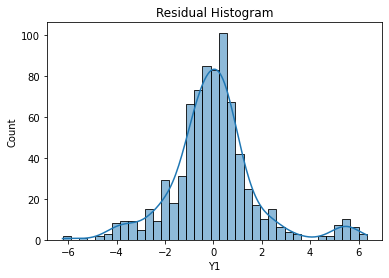

In [19]:
print("\nLinear Regression Equation:")
print(f"y = {model.intercept_} + {' + '.join([f'{coef}*{col}' for coef, col in zip(coefficients, X.columns)])}")

residuals = y - model.predict(X)
stat, p = shapiro(residuals)
print("\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Statistic: {stat}, P-Value: {p}")

sns.histplot(residuals, kde=True)
plt.title('Residual Histogram')
plt.show()

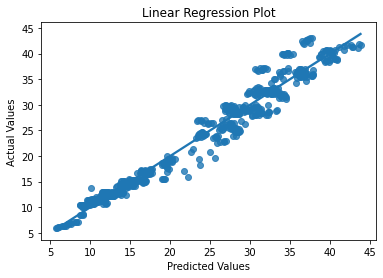


Comparison Metrics for Linear Regression:
MAE: 1.216060113384575, MSE: 3.139074870285597, RMSE: 1.771743454985963, MAPE: 5.574315228195411


In [20]:
X = df[['X1', 'X2', 'X3']].values  
y = df['y'].values  
with pm.Model() as model:
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slopes = pm.Normal('slopes', mu=0, sigma=10, shape=X.shape[1])  # One slope per feature
        sigma = pm.HalfNormal('sigma', sigma=1)  # Standard deviation of the errors
    y_hat = intercept + pm.math.dot(X, slopes)  # Linear prediction
        likelihood = pm.Normal('y', mu=y_hat, sigma=sigma, observed=y)
        trace = pm.sample(2000, return_inferencedata=True)
summary = az.summary(trace, hdi_prob=0.95)
print(summary)
coefficients = summary.loc[["intercept"] + [f"slopes[{i}]" for i in range(X.shape[1])], ["mean", "hdi_2.5%", "hdi_97.5%"]]
print(coefficients)
pm.traceplot(trace)
plt.show()


sns.regplot(x=model.predict(X), y=y)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Regression Plot')
plt.show()

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, mape


predicted = model.predict(X)
mae, mse, rmse, mape = calculate_metrics(y, predicted)

print("\nComparison Metrics for Linear Regression:")
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import norm

In [3]:
data = pd.read_excel('USA_Housing.xlsx')

In [4]:
data.head()

,Area Income,Area House Age,Area No of Rooms,Area No of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [5]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area Income          5000 non-null   float64
 1   Area House Age       5000 non-null   float64
 2   Area No of Rooms     5000 non-null   float64
 3   Area No of Bedrooms  5000 non-null   float64
 4   Area Population      5000 non-null   float64
 5   Price                5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


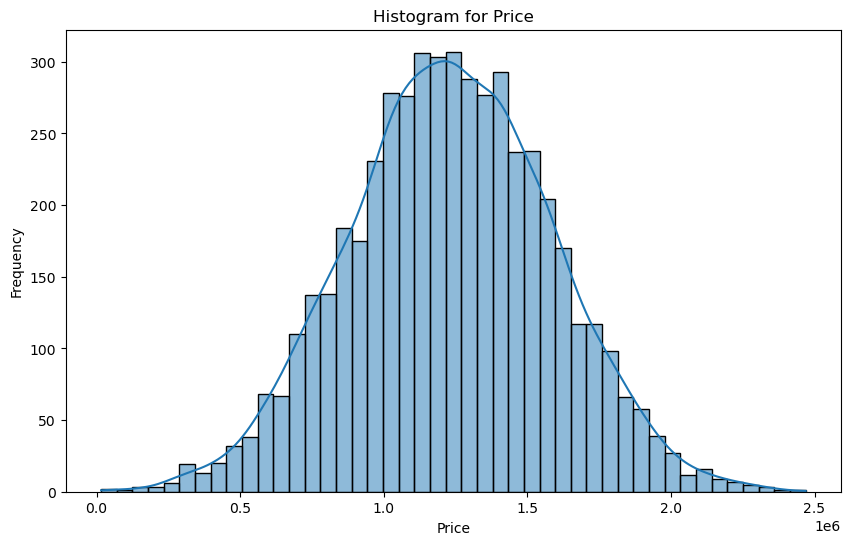

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title("Histogram for Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

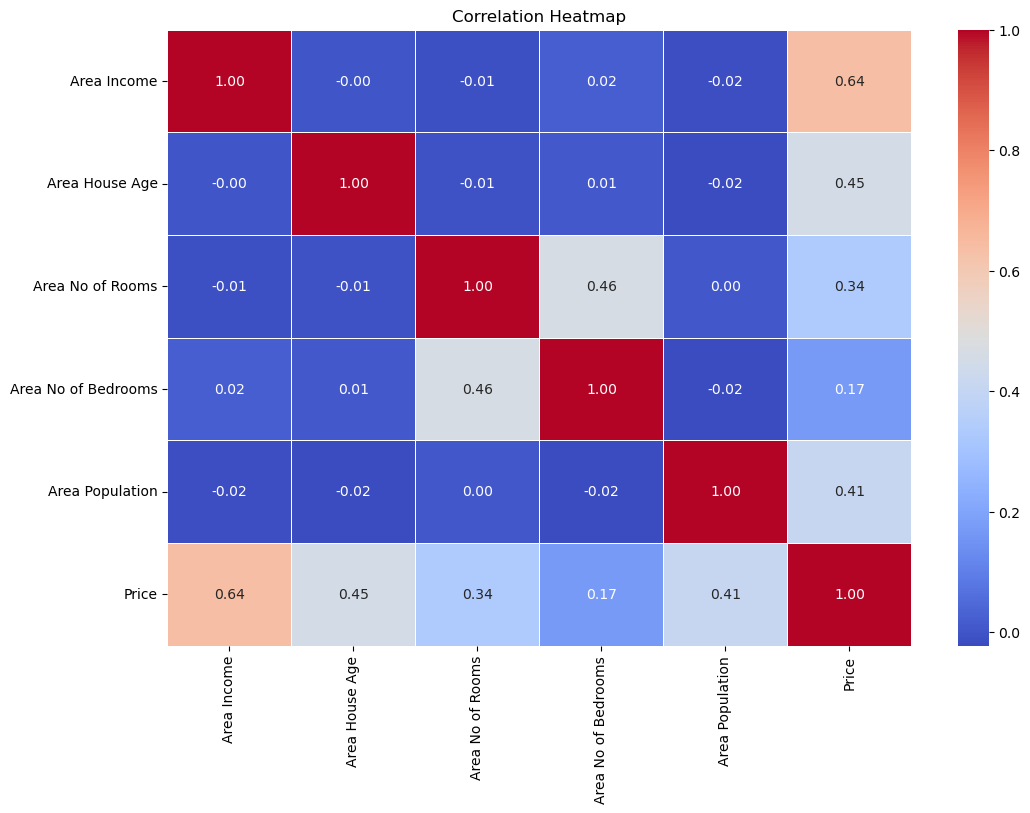

In [7]:
plt.figure(figsize=(12, 8))
corr = data.corr()  # Correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

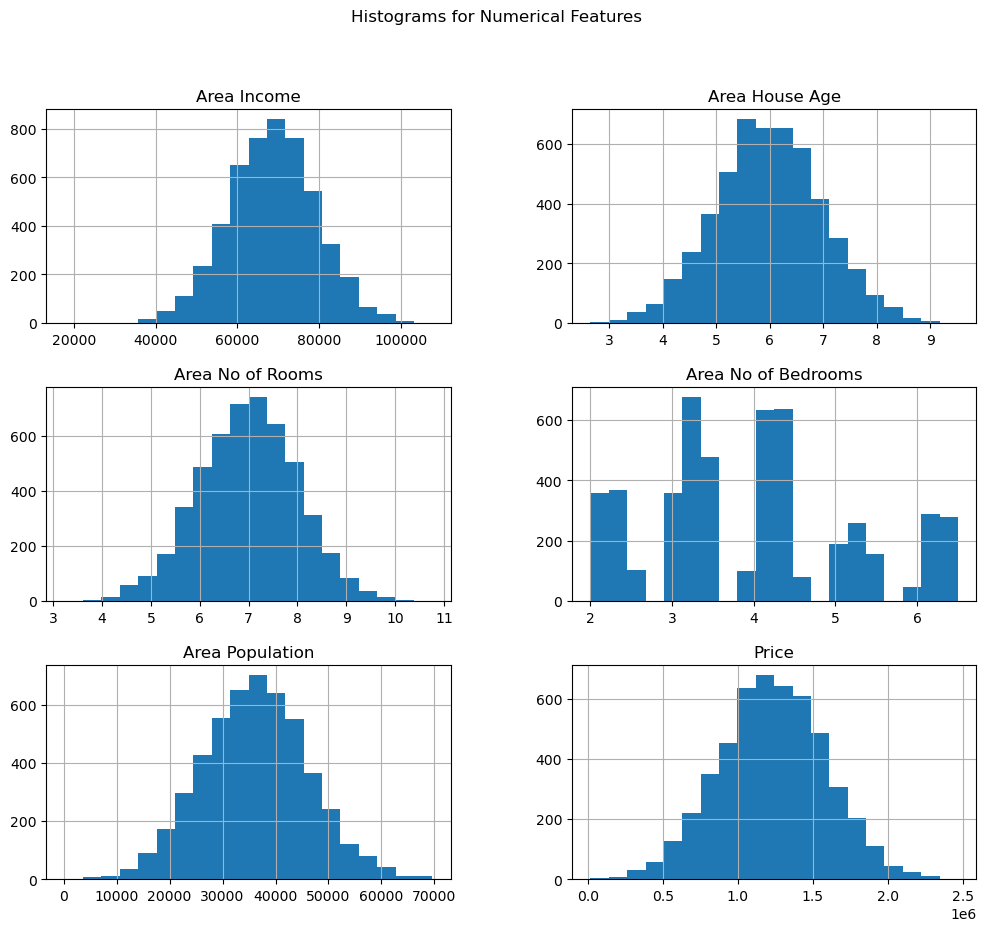

In [8]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms for Numerical Features")
plt.show()

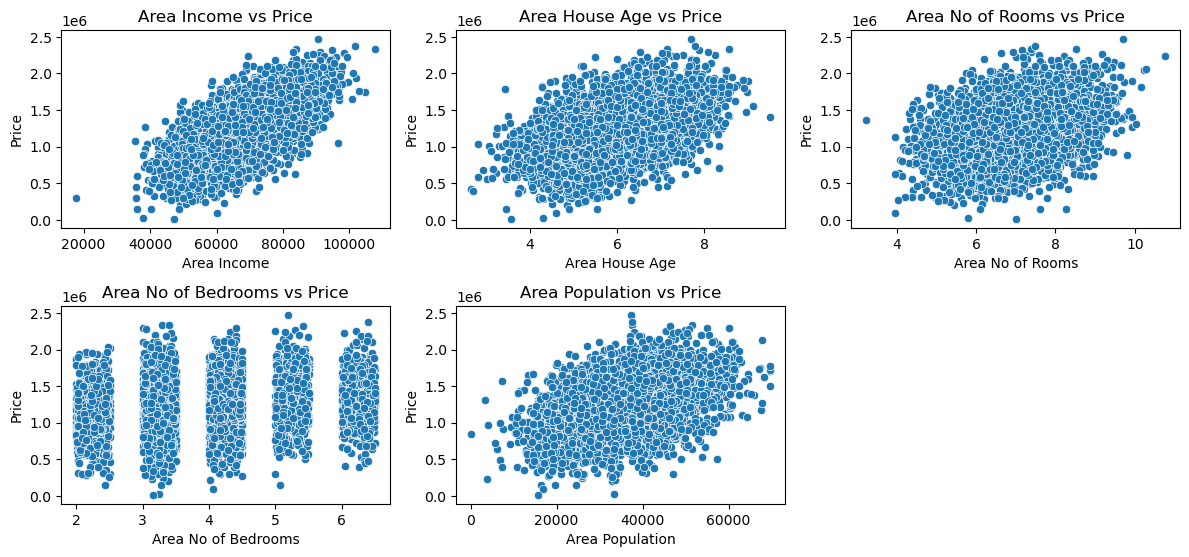

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]): 
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=data[col], y=data['Price'])
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

In [10]:
corr_with_price = data.corr()['Price'].sort_values(ascending=False)
print("\nCorrelation of Features with Price:")
print(corr_with_price)


Correlation of Features with Price:
Price                  1.000000
Area Income            0.639734
Area House Age         0.452543
Area Population        0.408556
Area No of Rooms       0.335664
Area No of Bedrooms    0.171071
Name: Price, dtype: float64


In [11]:
X = data.drop(columns=['Price'])
y = data['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print("\nLinear Regression Coefficients:")
print(coefficients)


Linear Regression Coefficients:
                       Coefficient
Area Income              21.570413
Area House Age       166552.477667
Area No of Rooms     119512.534381
Area No of Bedrooms    2758.951878
Area Population          15.296861


In [15]:
y_pred = lr.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
 
print("\nError Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Error Metrics:
Mean Absolute Error (MAE): 81331.22699046416
Mean Squared Error (MSE): 10119734875.098623
Root Mean Squared Error (RMSE): 100596.89296940847


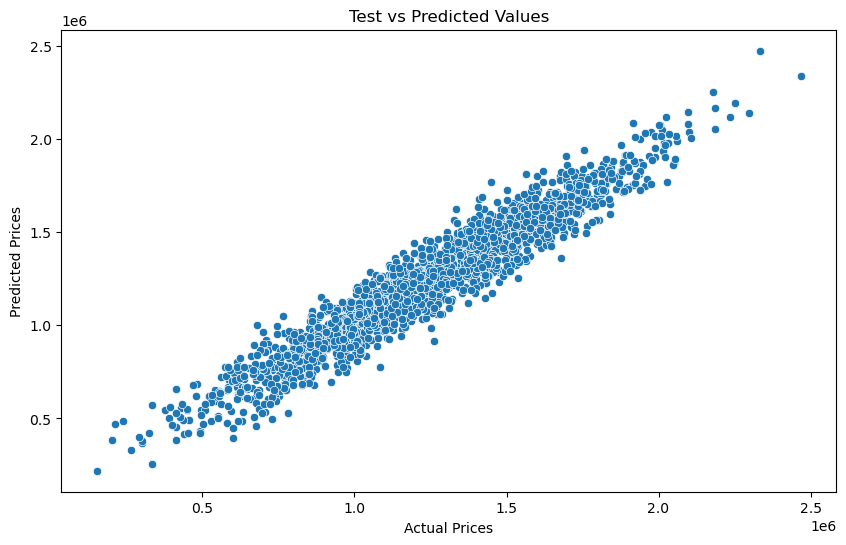

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Test vs Predicted Values")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

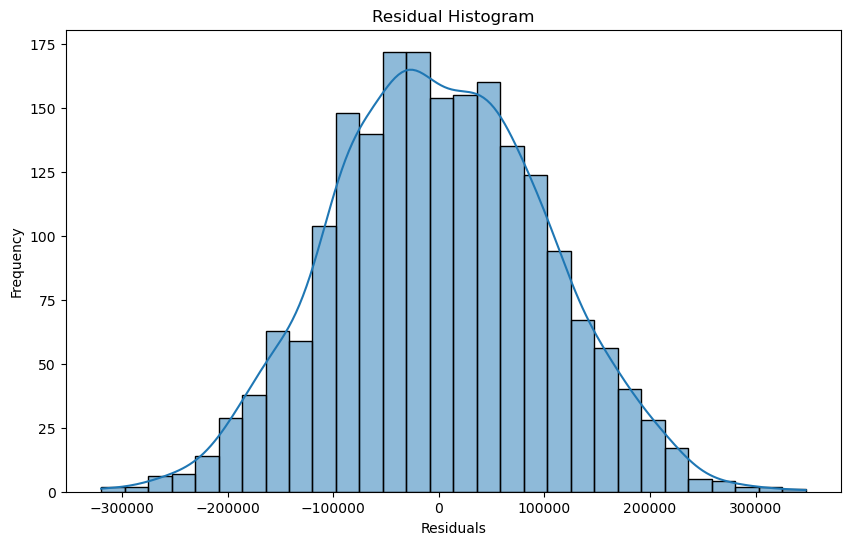

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()